In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv("F:/Python DS/db/BreastCancer.csv")
df

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
694,1369821,10,10,10,10,5,10,10,10,7,Malignant
695,1371026,5,10,10,10,4,10,5,6,3,Malignant
696,1371920,5,1,1,1,2,1,3,2,1,Benign
697,8233704,4,1,1,1,1,1,2,1,1,Benign


In [3]:
dum_df = pd.get_dummies(df,drop_first=True)
dum_df

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class_Malignant
0,61634,5,4,3,1,2,2,2,3,1,0
1,63375,9,1,2,6,4,10,7,7,2,1
2,76389,10,4,7,2,2,8,6,1,1,1
3,95719,6,10,10,10,8,10,7,10,7,1
4,128059,1,1,1,1,2,5,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,1369821,10,10,10,10,5,10,10,10,7,1
695,1371026,5,10,10,10,4,10,5,6,3,1
696,1371920,5,1,1,1,2,1,3,2,1,0
697,8233704,4,1,1,1,1,1,2,1,1,0


In [4]:
X = dum_df.drop('Class_Malignant', axis=1)
y = dum_df['Class_Malignant']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)


In [6]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)

In [7]:
print(confusion_matrix(y_test, y_pred))

[[137   1]
 [ 47  25]]


In [8]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.99      0.85       138
           1       0.96      0.35      0.51        72

    accuracy                           0.77       210
   macro avg       0.85      0.67      0.68       210
weighted avg       0.82      0.77      0.73       210



In [9]:
print(accuracy_score(y_test, y_pred))

0.7714285714285715


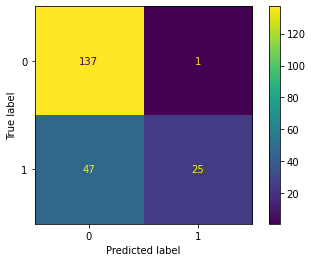

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gaussian, X_test, y_test) 
plt.show() 


In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

In [12]:
probs = gaussian.predict_proba(X_test)
y_pred_prob = probs[:,1]
probs

array([[9.25621874e-001, 7.43781259e-002],
       [7.31772546e-001, 2.68227454e-001],
       [7.52930755e-001, 2.47069245e-001],
       [5.21531244e-001, 4.78468756e-001],
       [5.76166563e-001, 4.23833437e-001],
       [8.37458660e-001, 1.62541340e-001],
       [7.04251847e-001, 2.95748153e-001],
       [7.04971451e-001, 2.95028549e-001],
       [7.18653664e-001, 2.81346336e-001],
       [7.63029586e-001, 2.36970414e-001],
       [7.14925033e-001, 2.85074967e-001],
       [7.40960070e-001, 2.59039930e-001],
       [5.96407962e-001, 4.03592038e-001],
       [7.73912543e-001, 2.26087457e-001],
       [6.62802310e-001, 3.37197690e-001],
       [7.12734466e-001, 2.87265534e-001],
       [7.47388247e-001, 2.52611753e-001],
       [7.04389849e-001, 2.95610151e-001],
       [7.25793017e-001, 2.74206983e-001],
       [7.29336776e-001, 2.70663224e-001],
       [7.08294843e-001, 2.91705157e-001],
       [5.04262429e-001, 4.95737571e-001],
       [7.58850042e-001, 2.41149958e-001],
       [6.4

In [14]:
y_pred_prob

array([7.43781259e-002, 2.68227454e-001, 2.47069245e-001, 4.78468756e-001,
       4.23833437e-001, 1.62541340e-001, 2.95748153e-001, 2.95028549e-001,
       2.81346336e-001, 2.36970414e-001, 2.85074967e-001, 2.59039930e-001,
       4.03592038e-001, 2.26087457e-001, 3.37197690e-001, 2.87265534e-001,
       2.52611753e-001, 2.95610151e-001, 2.74206983e-001, 2.70663224e-001,
       2.91705157e-001, 4.95737571e-001, 2.41149958e-001, 3.56884213e-001,
       2.80748483e-001, 4.84571791e-001, 4.97978795e-001, 5.89548598e-001,
       1.78700516e-001, 4.52245101e-001, 2.40663387e-001, 5.67802645e-001,
       1.96184457e-001, 6.12148392e-001, 3.01751570e-001, 2.93657714e-001,
       2.48490609e-001, 2.70789379e-001, 2.97724390e-001, 6.09346530e-001,
       2.82922414e-001, 2.86267163e-001, 3.33617736e-001, 2.33723980e-001,
       3.00281833e-001, 2.91932308e-001, 5.63340620e-001, 2.61524118e-001,
       5.18330918e-001, 2.41394533e-001, 3.14651646e-001, 2.58456906e-001,
       2.81281209e-001, 5

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

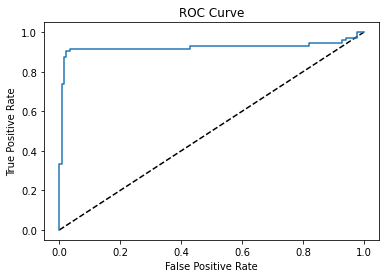

In [16]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [17]:
roc_auc_score(y_test, y_pred_prob)

0.9235104669887279